In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/umap/d

scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.24.3 scipy==1.11.1 pandas==1.5.3 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10


/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [3]:
doubletFinder = pd.read_csv('doubletFinder.tsv')
doubletFinder.set_index('Unnamed: 0', inplace = True)

In [4]:
doubletFinder

,doublet_finder
Unnamed: 0,
AAACCCAAGTATCTGC-1_1_1_1,Singlet
AAACCCACATGACTGT-1_1_1_1,Singlet
AAACGCTGTACAGAGC-1_1_1_1,Singlet
AAAGGATTCCAAACCA-1_1_1_1,Singlet
AAAGGGCAGTCTACCA-1_1_1_1,Singlet
...,...
TTTGTTGGTCACTAGT-1_2_2_2,Singlet
TTTGTTGTCACATCAG-1_2_2_2,Singlet
TTTGTTGTCAGGACGA-1_2_2_2,Singlet


In [5]:
adata = sc.read_h5ad('/vol/ExtraVol/LP_FSCs_raw.h5ad')

In [6]:
adata.obs['doubletFinder'] = doubletFinder['doublet_finder']  

In [7]:
adata

AnnData object with n_obs × n_vars = 71645 × 40879
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Sample_ID', 'stage', 'doubletFinder'
    var: 'features'

In [8]:
adata.var_names

Index(['Gm26206', 'Xkr4', 'Gm53491', 'Rp1', 'Sox17', 'Gm22307', 'Gm37323',
       'Gm39586', 'Gm46082', 'Gm29874',
       ...
       'ND4', 'TrnH', 'TrnS2', 'TrnL2', 'ND5', 'ND6', 'TrnE', 'CYTB', 'TrnT',
       'TrnP'],
      dtype='object', length=40879)

normalizing counts per cell
    finished (0:00:01)


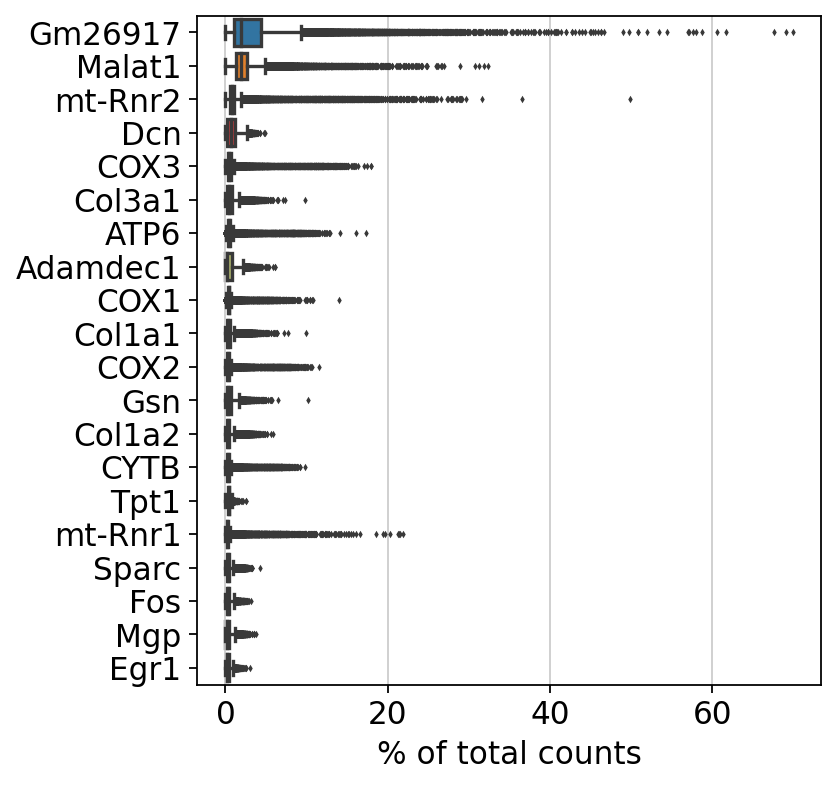

In [9]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [10]:
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

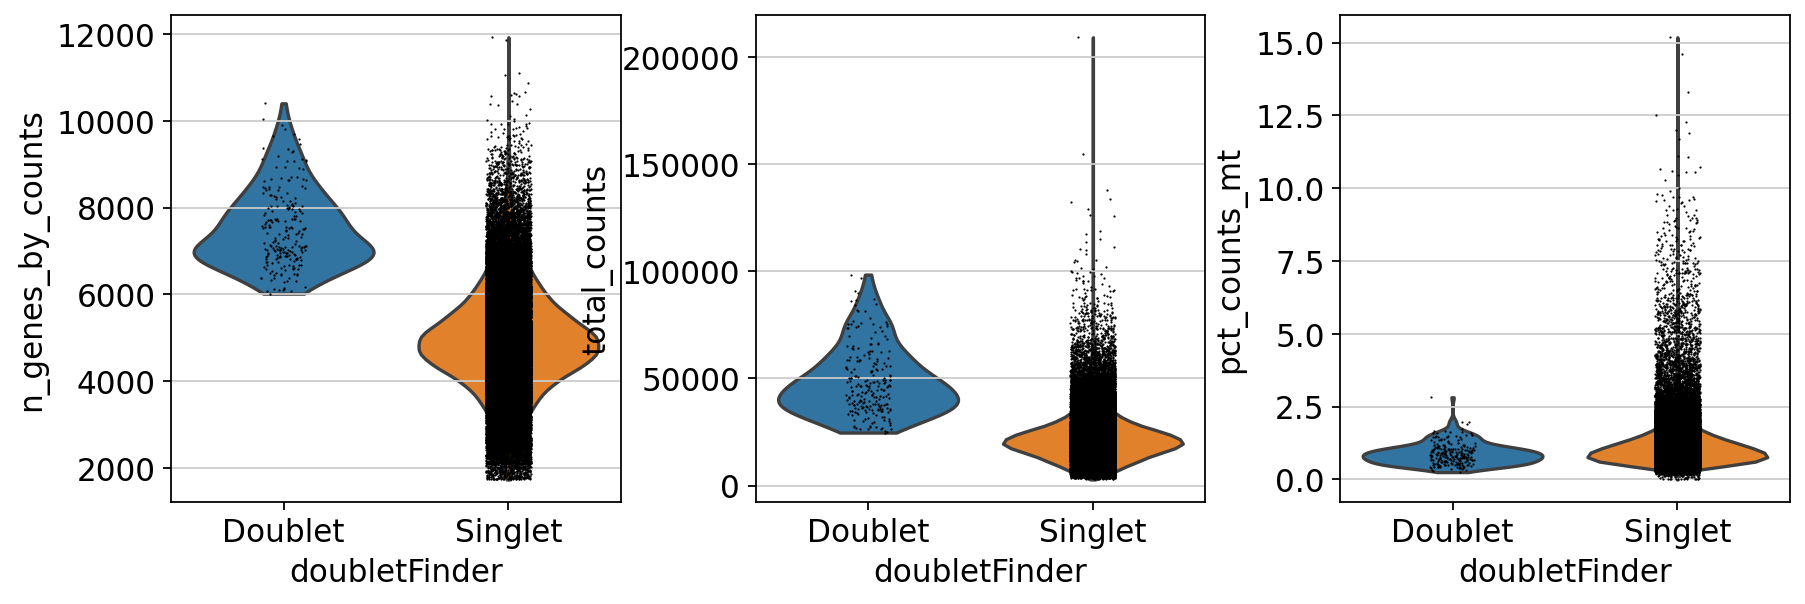

In [11]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.1, multi_panel=True, groupby = 'doubletFinder')

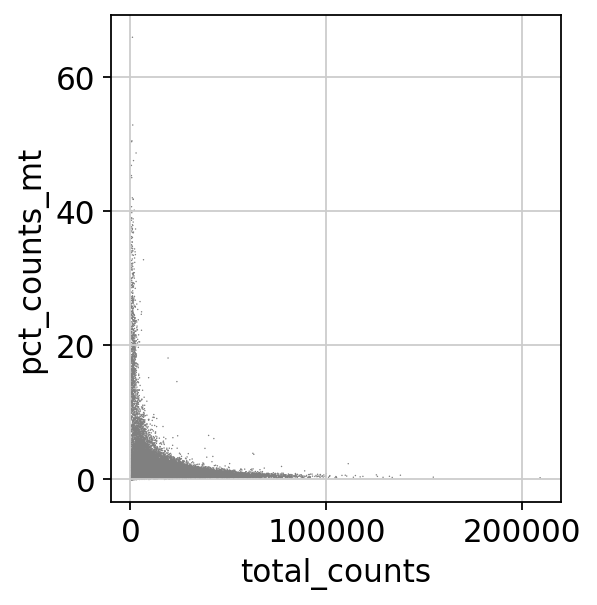

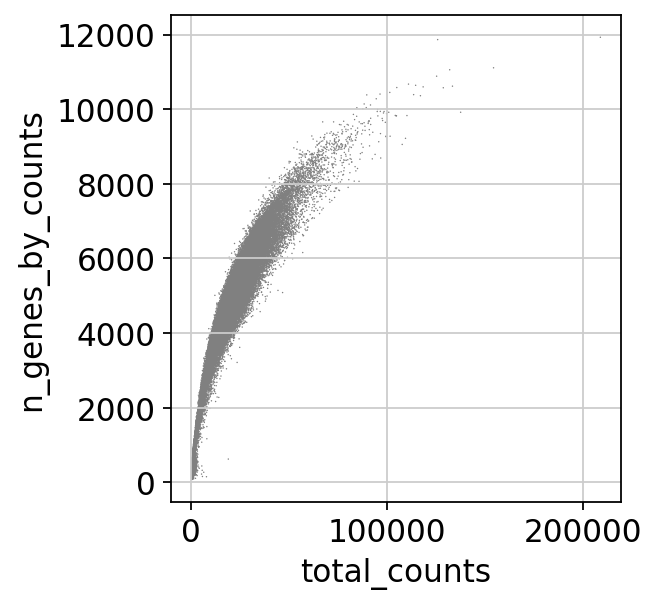

In [12]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [13]:
adata.layers["raw_counts"] = adata.X.copy()

In [14]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:01)


In [15]:
sc.pp.log1p(adata)

In [16]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:07)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


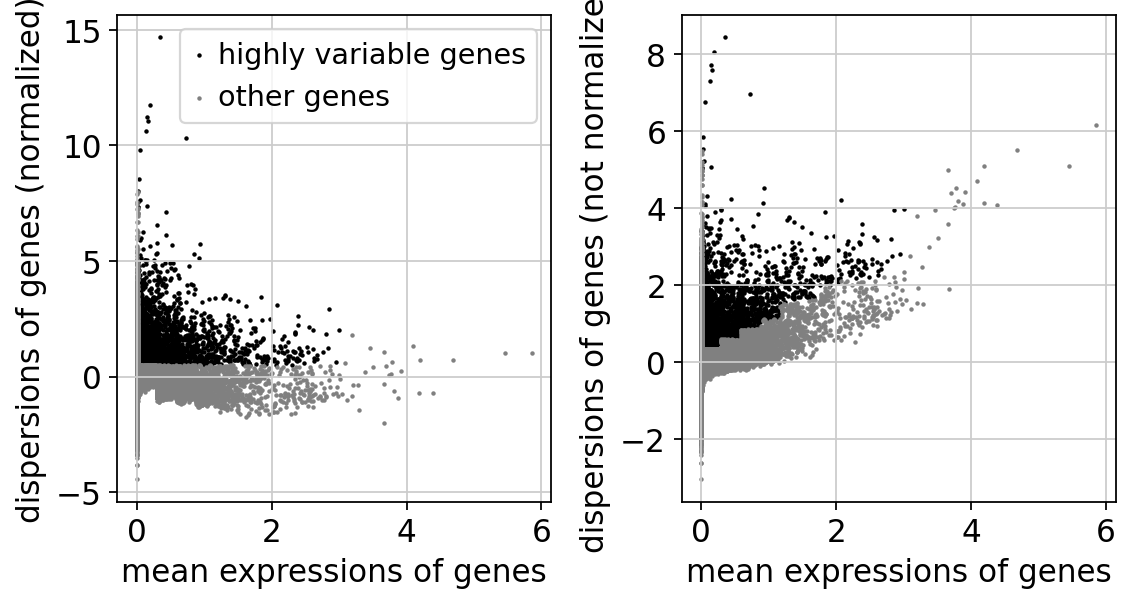

In [17]:
sc.pl.highly_variable_genes(adata)

In [18]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:39)


/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


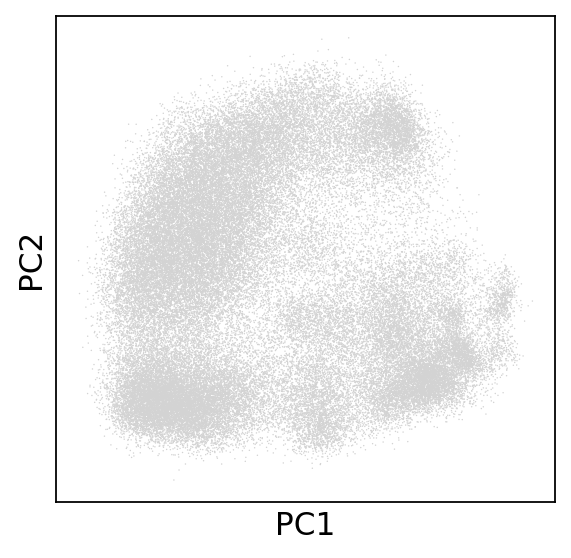

In [19]:
sc.pl.pca(adata)

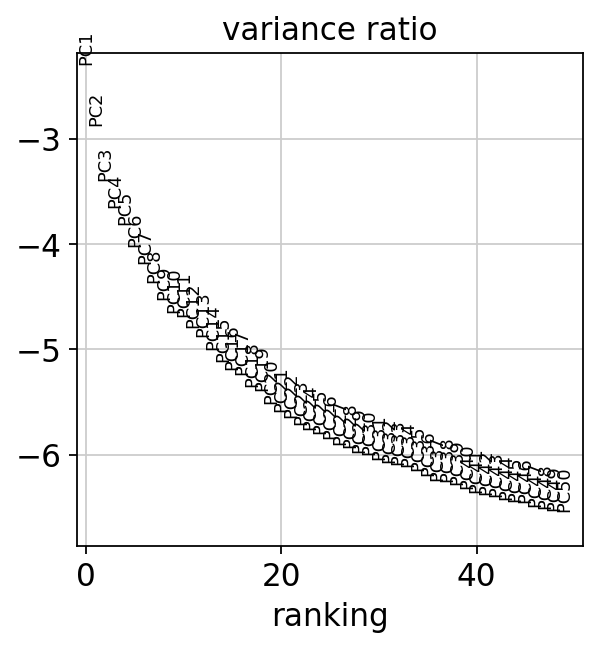

In [20]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

In [21]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:19)


In [22]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:30)


In [23]:
sc.tl.leiden(adata, resolution = 0.2)

running Leiden clustering
    finished: found 16 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:14)


In [24]:
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:02)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:26)


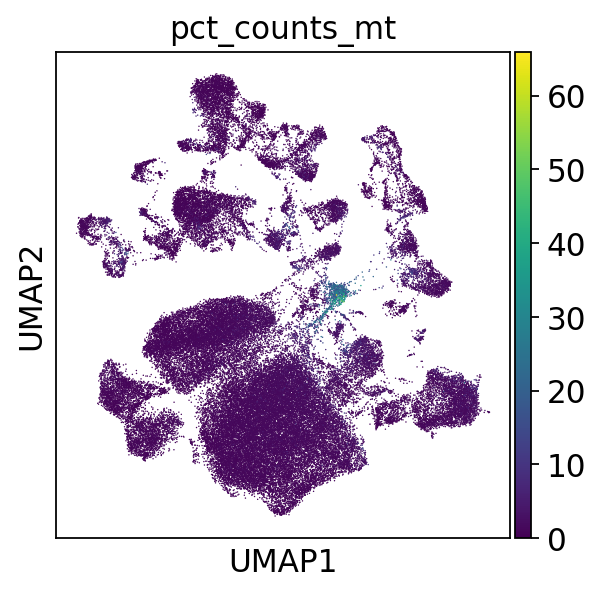

In [25]:
sc.pl.umap(adata, color = "pct_counts_mt", use_raw=False)

/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


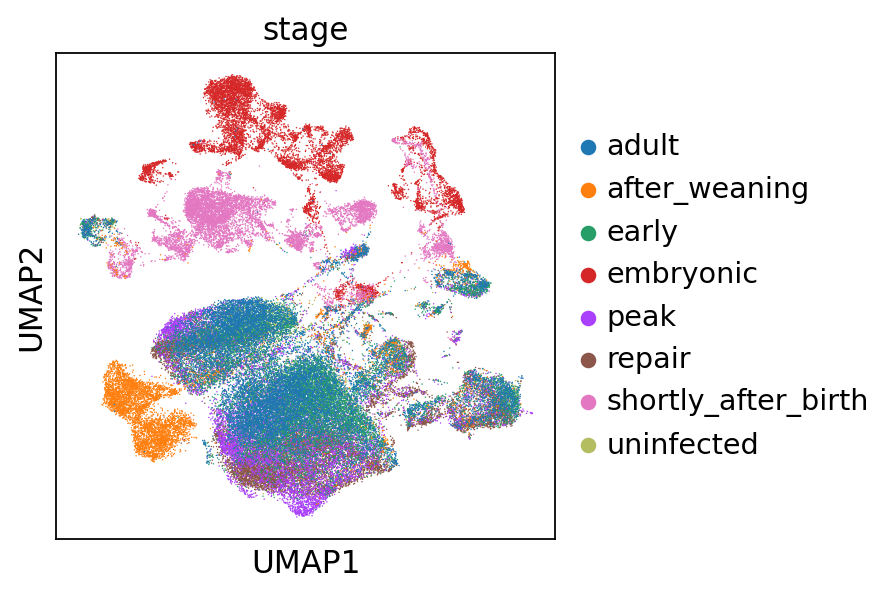

In [26]:
sc.pl.umap(adata, color = "stage", use_raw=False)

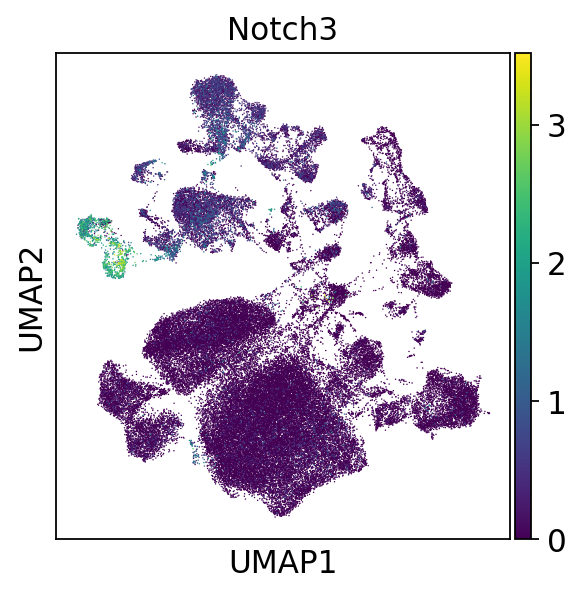

In [27]:
sc.pl.umap(adata, color = "Notch3", use_raw=False)

/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


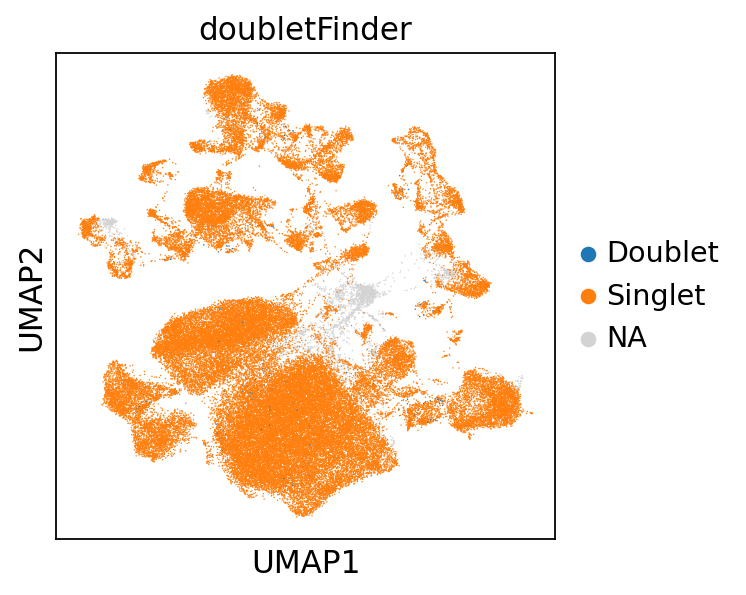

In [28]:
sc.pl.umap(adata, color = "doubletFinder", use_raw=False)

/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


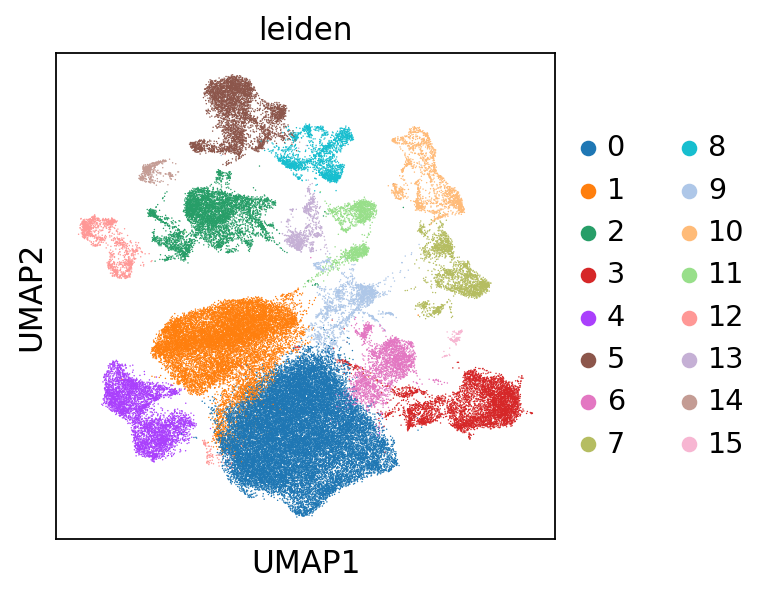

In [29]:
sc.pl.umap(adata, color=['leiden'], use_raw=False)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:06:23)


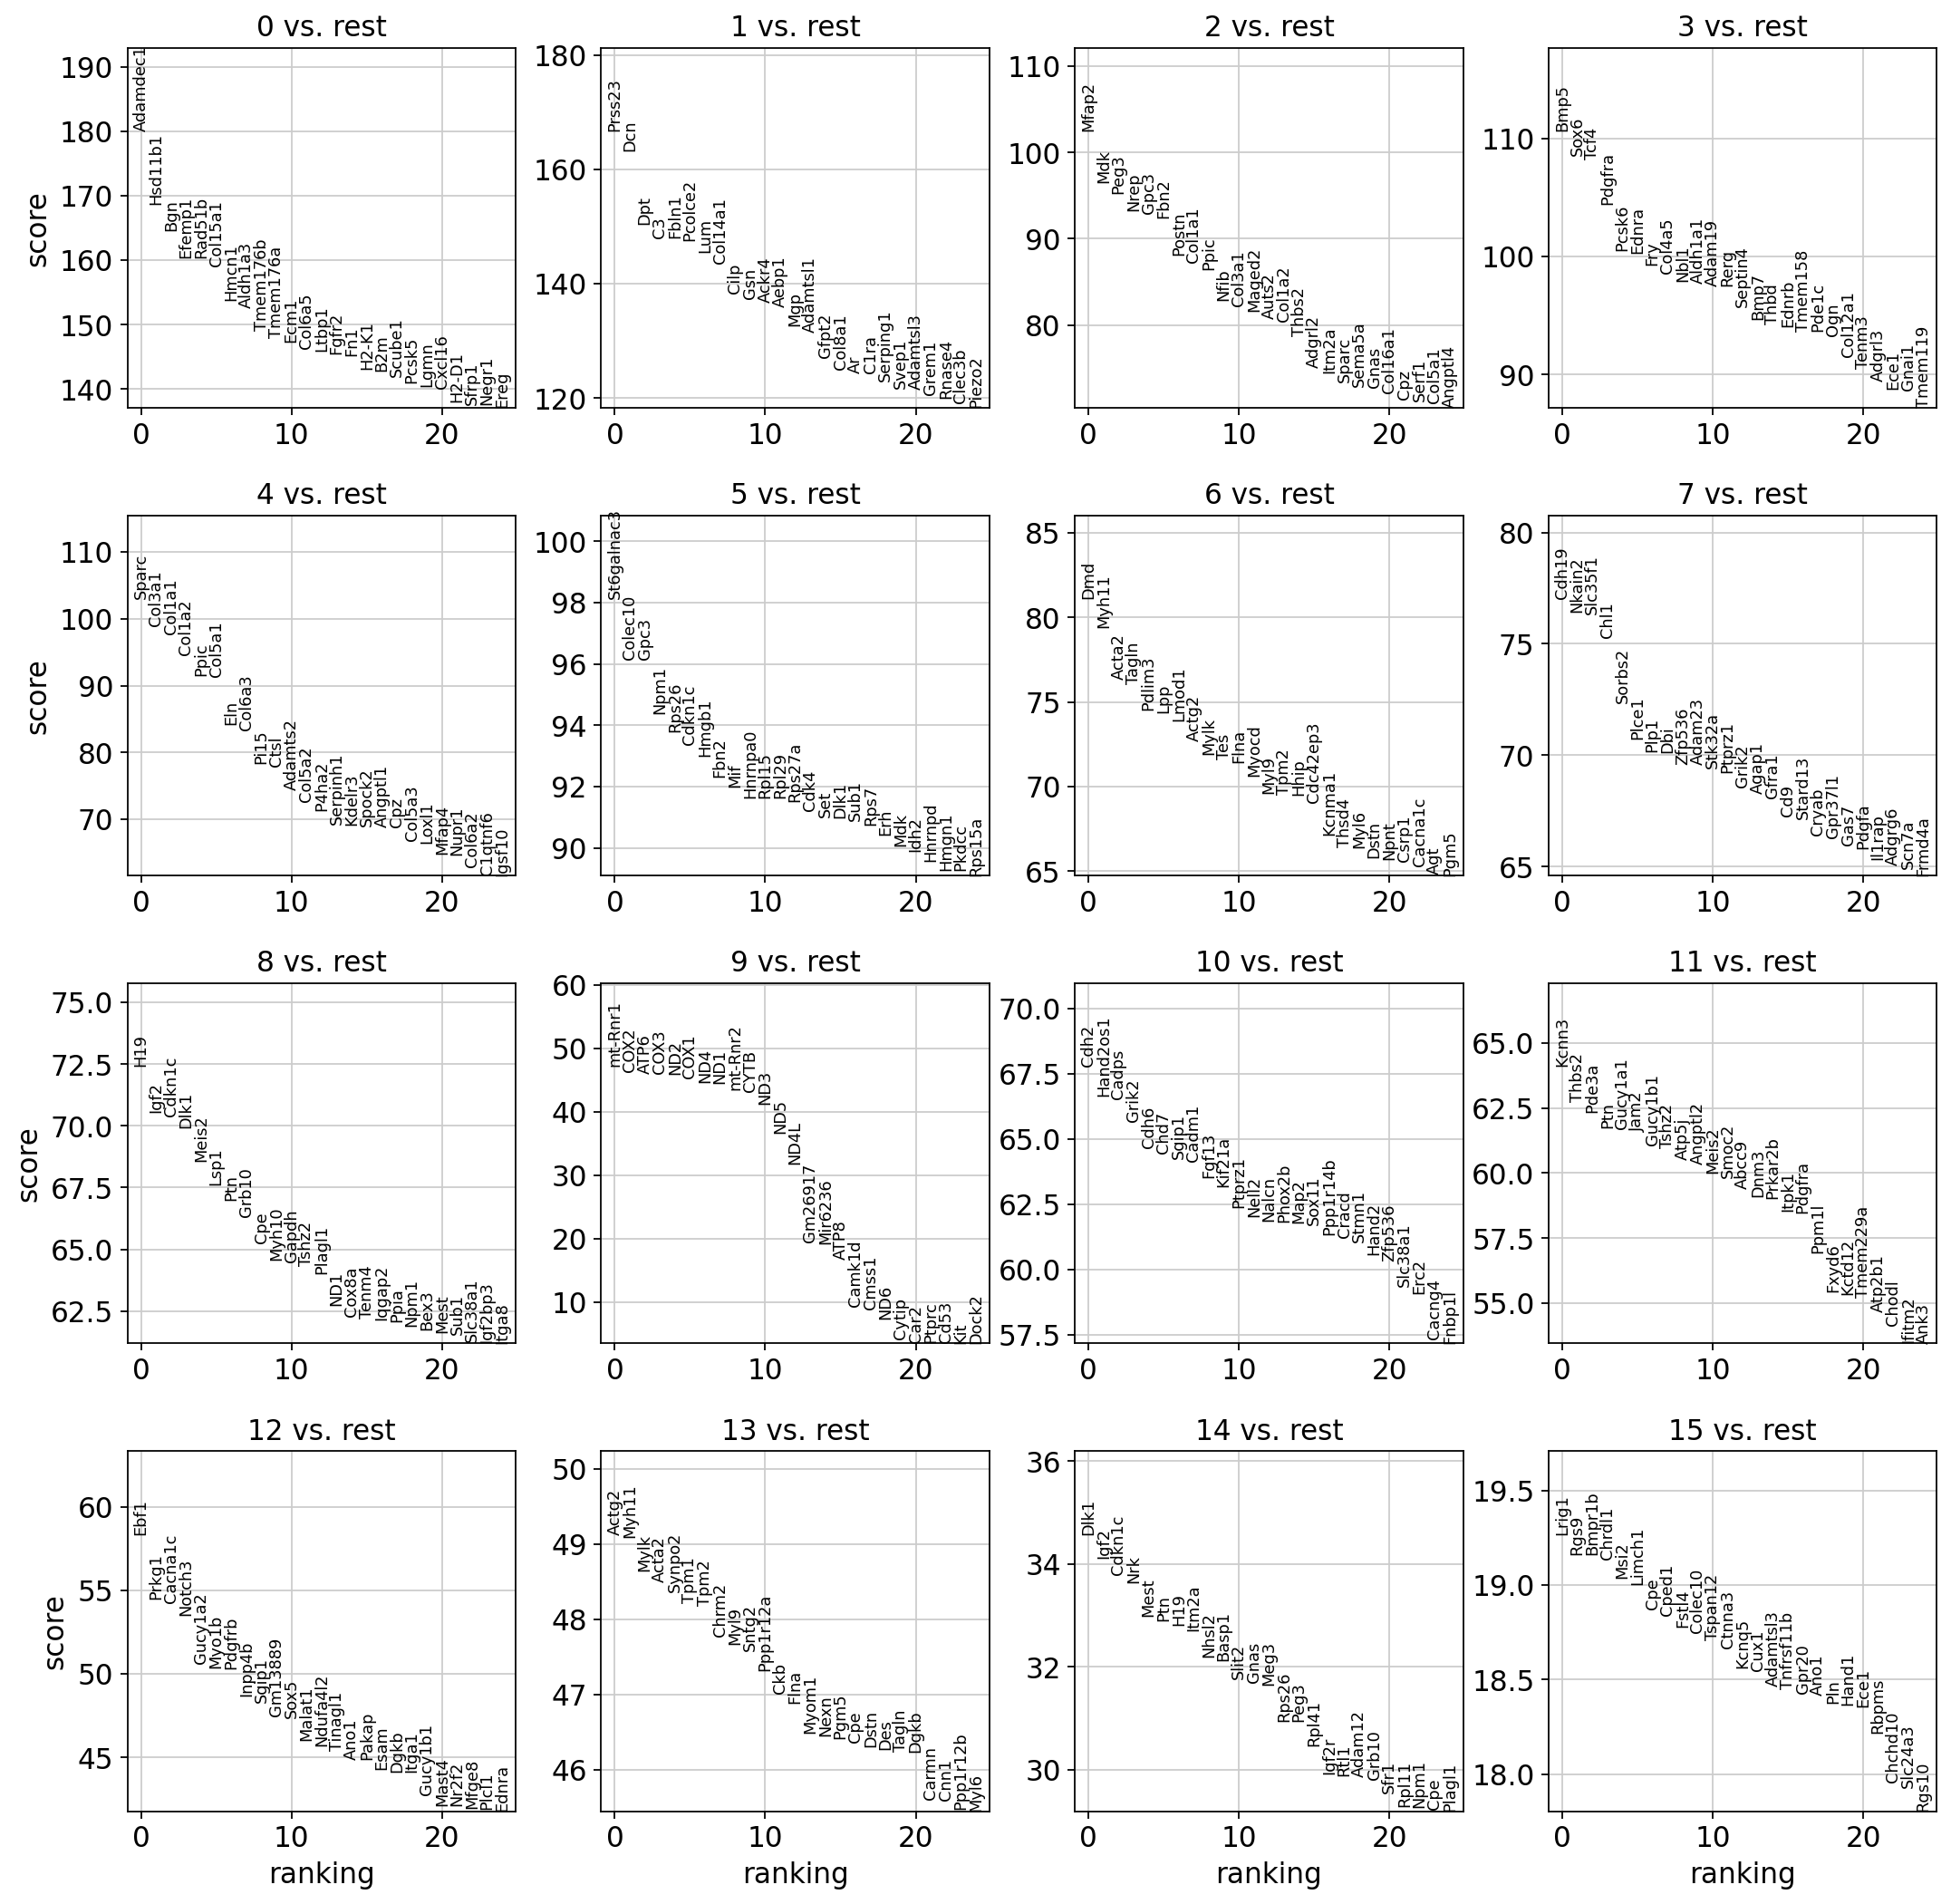

In [30]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', use_raw = False)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [31]:
adata_clean_temp =  adata[adata.obs["leiden"] != "9"]
adata_clean = adata_clean_temp[adata_clean_temp.obs["doubletFinder"] == "Singlet"]
adata_clean

View of AnnData object with n_obs × n_vars = 67530 × 40879
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Sample_ID', 'stage', 'doubletFinder', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'features', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'doubletFinder_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'paga', 'leiden_sizes', 'stage_colors', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts'
    obsp: 'distances', 'connectivities'

In [32]:
adata_clean.obs["leiden"]
adata_clean.obs["doubletFinder"]

AAACCCAAGTATCTGC-1_1_1_1    Singlet
AAACCCACATGACTGT-1_1_1_1    Singlet
AAACGCTGTACAGAGC-1_1_1_1    Singlet
AAAGGATTCCAAACCA-1_1_1_1    Singlet
AAAGGGCAGTCTACCA-1_1_1_1    Singlet
                             ...   
TTTGTTGGTCACTAGT-1_2_2_2    Singlet
TTTGTTGTCACATCAG-1_2_2_2    Singlet
TTTGTTGTCAGGACGA-1_2_2_2    Singlet
TTTGTTGTCCCATAAG-1_2_2_2    Singlet
TTTGTTGTCTGGTGCG-1_2_2_2    Singlet
Name: doubletFinder, Length: 67530, dtype: category
Categories (1, object): ['Singlet']

In [33]:
adata_clean.__dict__['_raw'].__dict__['_var'] = adata_clean.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})

In [34]:
adata_clean.write_h5ad("/vol/ExtraVol/LP_FSCs_cleaned.h5ad") 

In [35]:
adata_clean = sc.read_h5ad('/vol/ExtraVol/LP_FSCs_cleaned.h5ad')

In [36]:
adata_clean

AnnData object with n_obs × n_vars = 67530 × 40879
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Sample_ID', 'stage', 'doubletFinder', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'features', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'doubletFinder_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'stage_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts'
    obsp: 'connectivities', 'distances'

In [37]:
adata_clean.layers

Layers with keys: raw_counts